> Note: Please read Question 17 at the end of this document carefully before you start your work! You will need to provide a detailed discussion of how you used GenAI for this assignment so make sure to keep notes, create screenshots, etc. so you keep track of your “discussions” as you go through each question.

> Note: Please also review the assignment PDF in this assignment. That document has the most details about what you are expected to do to complete this individual assignment. Good luck! 

# Tuango - Targeting Mobile App Messages

Prepare "Tuango: Targeting Mobile Push Messages" for class discussion and as an individual assignment and submit the assignment through GitHub. Detailed instructions are available on Canvas (tuango.pdf). See the assignment on Canvas for the "invitation" to get the repo. Once you accepted the invitation, you should see the repo at the page below.

See the assignment on Canvas for the "invitation" to get the repo. Once you accepted the invitation, you should see the repo at the page below.

<https://github.com/rady-msba>

Add code and your answers for all questions to the tuango.ipynb. When you are done with this individual assignment, save your code and commit and push the results to GitHub. Of course you can commit and push code as often as you like, but only before the due date. View the video linked below to refresh your memory on how to clone and push repos.

https://youtu.be/w6yzFv44CMc 

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

Note that your python code must be fully "reproducible". That is, your code must without errors on my (or the TAs) computer. There are will not be any explicit tests for this assignment to confirm if your answers are (not) correct. However, the system will run your code and it is important to check that there is a green checkmark rather than a red X. See .github/workflows/run-code.yml for the configuration. 

If you get a red X, that means your code did not run without errors and that there are things for you the check and fix. When you are done, submit the link to your repo to Canvas. To help you get started, review the logistic regression examples available using the command below. Focus on the bbb-logistic example.

usethis "https://www.dropbox.com/sh/af6t2nvca610d13/AAAtJSph3kyajjd9698MJ1zIa?dl=1"

This is an individual assignment. As a reminder, it is an honor code violation to share any assignment or exam solution from this class with another student in a current class or a future class generation. This includes using cloud storage like Google Drive. It is also an honor code violation to obtain assignments or exams from a student in another current class or a past class generation for use as an aid in solving problems to be turned in and  graded. Please respect the honor code as it helps to maintain parity in the classroom. Any suspected violation will be reported to the Academic Integrity Office for review.

## Setup

Please complete this python notebook by answering the questions 1-16 in `tuango-msba.pdf`. The code blocks below will load a few python modules you will need and also the data you will need for this first notebook. As you will see, you will also need to create a second notebook called `tuango-post.ipynb`.

> Hint: Make sure to study the reading on "Applied Logistic Regression using Pyrsm and Radiant-for-Python" which has examples on how to run logistic regression models using the PYRSM package

In [32]:
import numpy as np
import pandas as pd
import polars as pl
import pyrsm as rsm
import seaborn as sns

# you can import additional python packages but only use packages that
# are already part of the docker container

In [33]:
# check that you have version 0.9.10 of pyrsm or newer
rsm.__version__

'0.9.13'

In [34]:
# Use this dataset and notebook to answer questions 1-13
tuango = pd.read_parquet("data/tuango_pre.parquet")

In [35]:
# feel free to use polars instead of pandas if you prefer
# but you will need to ajust some of the sample code below 
# to make it work
# tuango = pl.read_parquet("data/tuango_pre.parquet")

In [36]:
# dataset description
tuango_description = rsm.md("data/tuango_pre_description.md")

# Tuango: Targeting Mobile App Push Messages

This file contains information about the test and does not have results about the roll-out. Values for `buyer` and `ordersize` are missing for all customers that were not part of the test.

## Variable Names and Descriptions
* userid: Unique user ID

**Response to the customized push message**
* buyer: Did the customer buy the Karaoke deal? ("yes" or "no")
* ordersize: Number of 30-minute Karaoke sessions the customer purchased

**Recency, Frequency, and Monetary variables**
* recency: Days since last purchase of a deal (before the Karaoke deal offer)
* frequency: Number of deals purchased during the one year period before the Karaoke deal offer
* monetary: Average amount spent per order (in RMB) during the one year period before the Karaoke deal offer

**Other variables in the dataset**
* age: Age of the customer
* gender: Gender identity of the customer (M = male, F = female, O = Other or unknown)
* music: Customer made a purchase in the music category during the one-year period before the Karaoke deal offer ("no" or "yes")
* test: Splits the dataset into test (1) and rollout (0) data
* training: Splits the dataset into training (1) and test (0) data. This variable will not be used in this assignment

In [37]:
# you will likely find the below useful in this assignment
# (i.e., there are missing values in the data that you will need to deal with)
tuango.buyer.value_counts(dropna=False)

buyer
NaN    397252
no      18888
yes      2020
Name: count, dtype: int64

In [38]:
# you will likely find the below useful in this assignment
tuango.buyer.isna().value_counts()

buyer
True     397252
False     20908
Name: count, dtype: int64

In [39]:
# create a variable called 'buyer_yes' that has value 1 when buyer == 'yes', has value 0 when buyer == 'no' and has value np.nan when buyer.isna() is True
tuango["buyer_yes"] = np.where(tuango.buyer == 'yes', 1, np.where(tuango.buyer == 'no', 0, np.nan))

# you can check that you have this set up correctly using the command below
tuango.buyer_yes.value_counts(dropna=False)

buyer_yes
NaN    397252
0.0     18888
1.0      2020
Name: count, dtype: int64

In [40]:
tuango.head()
tuango.tail()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test,buyer_yes
418155,U83013842,NaN,NaN,19,4.0,128.00,25,F,yes,NaN,0,NaN
418156,U45426448,NaN,NaN,131,2.0,110.74,20,O,yes,NaN,0,NaN
418157,U48935927,NaN,NaN,53,1.0,126.00,71,M,no,NaN,0,NaN
418158,U94568595,NaN,NaN,12,4.0,98.00,64,M,yes,NaN,0,NaN
418159,U20558740,NaN,NaN,10,3.0,260.00,34,F,yes,NaN,0,NaN


## Part I:  Preliminary Analysis

### Question 1

What percentage of customers responded to the deal offer message (i.e., bought the deal)?

In [41]:
# insert calculation code here
# the result should be expressed as a percentage as a string with 2 decimal 
# places and assigned to q1 (e.g., q1 = '5.43%')
per_buyer_yes = tuango.buyer_yes.mean()
q1 = per_buyer_yes
q1 = f"{q1:.2%}"
q1

'9.66%'

### Question 2

What was the average number of sessions purchased by customers that bought one or more 30-minute sessions? Use the ordersize variable for your calculation.

Create a pivot table with count, mean and std. deviation of `ordersize` by `buyer`

In [42]:
# insert calculation code here to create a pd.pivot_table that shows
# (1) counts the number of yes and no, (2) the mean ordersize, and 
# (3) the standard deviation in ordersize for yes and no responses
num_yes_no = pd.pivot_table(tuango, values='ordersize', index='buyer', 
                    aggfunc=['count', 'mean', 'std'])


q2 = num_yes_no

# the below should show your result
# do not apply any rounding to your answer
q2.loc["yes", "mean"]
#q2

/tmp/ipykernel_8716/2802650802.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  num_yes_no = pd.pivot_table(tuango, values='ordersize', index='buyer',
/tmp/ipykernel_8716/2802650802.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  num_yes_no = pd.pivot_table(tuango, values='ordersize', index='buyer',
/tmp/ipykernel_8716/2802650802.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  num_yes_no = pd.pivot_table(tuango, values='ordersize', index='buyer',


ordersize    3.941089
Name: yes, dtype: float64

## Part II: Building Targeting Models
### Question 3

Estimate a logistic regression model using buyer as the dependent variable (target) and, recency, frequency, monetary, age, gender, and music as the explanatory variables (features)

In [43]:
tuango_dropped = tuango.dropna()

missing_values_after_dropping = tuango_dropped.isnull().sum()

missing_values_after_dropping

tuango_dropped.buyer.value_counts(dropna=False)

buyer
no     18888
yes     2020
Name: count, dtype: int64

In [44]:


lr = rsm.model.logistic(
    data={"tuango": tuango_dropped}, rvar="buyer", lev="yes", evar=["recency", "frequency", "monetary", "age", "gender", "music"]
)

#lr.summary(test=["recency", "frequency", "monetary", "age", "gender", "music"])
lr.summary()

Logistic regression (GLM)
Data                 : tuango
Response variable    : buyer
Level                : yes
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

               OR     OR%  coefficient  std.error  z.value p.value     
Intercept   0.051  -94.9%        -2.98      0.097  -30.768  < .001  ***
gender[F]   1.731   73.1%         0.55      0.054   10.073  < .001  ***
gender[O]   1.078    7.8%         0.07      0.128    0.584   0.559     
music[yes]  1.908   90.8%         0.65      0.059   10.912  < .001  ***
recency     0.999   -0.1%        -0.00      0.000   -3.292  < .001  ***
frequency   1.114   11.4%         0.11      0.010   10.861  < .001  ***
monetary    1.002    0.2%         0.00      0.000   12.499  < .001  ***
age         0.988   -1.2%        -0.01      0.001   -9.115  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squar

### Question 4

Create Prediction plots for all explanatory variables. Describe the effect of each explanatory variable on the probability that a customer will purchase the karaoke deal

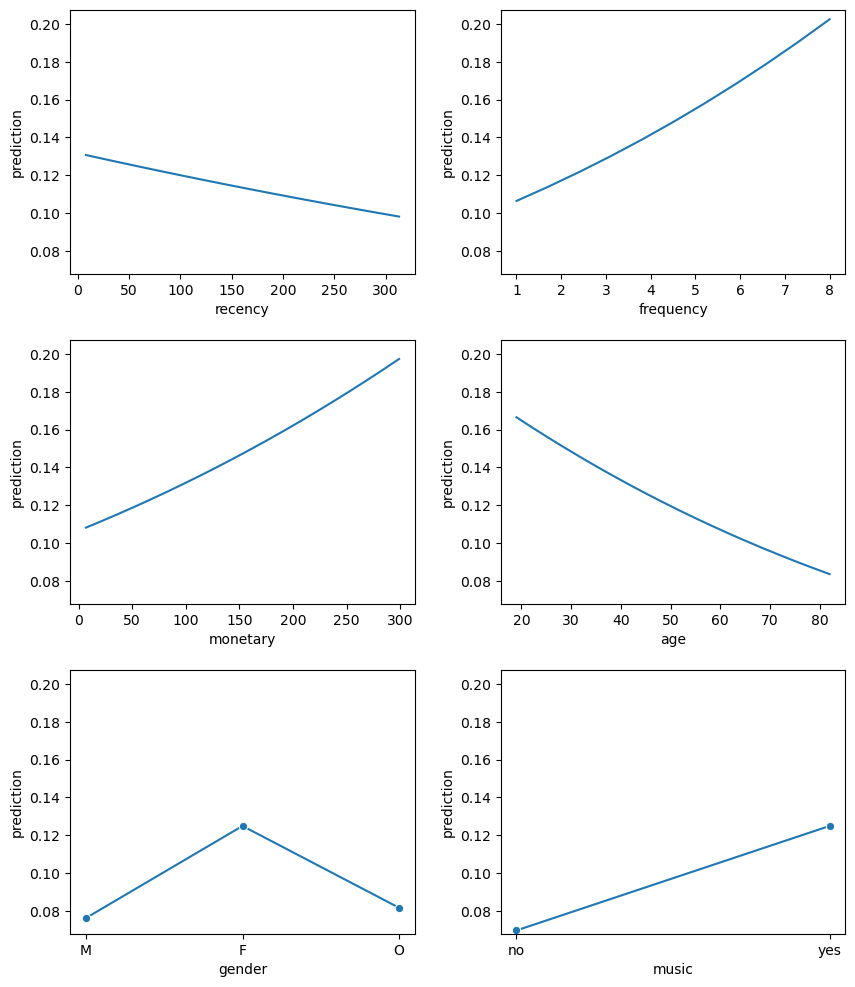

In [45]:
lr.plot("pred")

recency: The probability of buying the deal decreases as the recency increases. The probability of buying the deal is the highest when the recency is 0. The probability of buying the deal is the lowest when the recency is 300 or more. Keeping all other variables constant.

frequency: The probability of buying the deal increases as the frequency increases. The probability of buying the deal is the highest when the frequency is 8 or more. The probability of buying the deal is the lowest when the frequency is 0. Keeping all other variables constant.

monetary: The probability of buying the deal increases as the monetary increases. The probability of buying the deal is the highest when the monetary is 300 or more. The probability of buying the deal is the lowest when the monetary is 0. Keeping all other variables constant.

age: The probability of buying the deal decreases as the age increases. The probability of buying the deal is the highest when the age is 20. The probability of buying the deal is the lowest when the monetary is 80 or more. Keeping all other variables constant.

gender: Males (M) have a lower probability of purchasing the deal compared to females (F). With another category (O) showing a different probability that does not follow a clear trend from this plot alone. Keeping all other variables constant.

music: Customers who have a preference for music ('yes') have a higher probability of purchasing the karaoke deal than those who do not ('no'). Keeping all other variables constant.

### Question 5

Use Permutation Importance to assess variable importance. Which variables seem to be most important in the model?

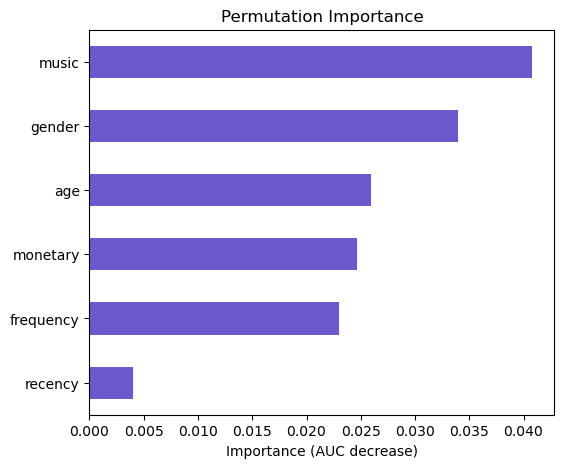

In [46]:
lr.plot("vimp")
# The variable with the highest vimp is: Music. 
# This means that music is the most important variable in predicting whether a customer will buy or not.

### Question 6

Add the predicted values from the logistic regression to the "tuango" DataFrame. Use "pred_logit" as the variable name. Compare the average of the predicted values to the overall response rate (i.e., percentage of buyers). What do you notice when you do this calculation using only the data used to estimate the model? Explain.

In [47]:
lr_predict = lr.predict() # predict the probability of buying for each customer
lr_predict
tuango['pred_logit'] = lr_predict['prediction']
tuango.head()
#compare the average of the predicted values to the overall response rate
tuango['pred_logit'].mean(), tuango['buyer_yes'].mean()

diff = tuango['pred_logit'].mean() - tuango['buyer_yes'].mean()
diff

tuango['pred_logit'].mean(), tuango['buyer_yes'].mean()

# diff between the average of the predicted values and the overall response rate is 2.0122792321330962e-15, which is very small.
# This means that the average of the predicted values is very close to the overall response rate.
# This means that the model is well calibrated.


(0.09661373636885603, 0.09661373636885402)

### Question 7

Estimate a linear regression model using "ordersize" as the response variable and recency, frequency, monetary, age, gender, and music as the explanatory variables. Estimate this regression using only those customers who placed an order after the deal offer message. Describe why you think it does (not) make sense to focus on this group of customers.

In [48]:
tuango_ordered = tuango[tuango['ordersize'] > 0].copy()
linear = rsm.model.regress(data={"tuango": tuango_ordered}, rvar="ordersize", evar=["recency", "frequency", "monetary", "age", "gender", "music"])

linear.summary()

Linear regression (OLS)
Data                 : tuango
Response variable    : ordersize
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: the effect of x on ordersize is zero
Alt. hyp.: the effect of x on ordersize is not zero

            coefficient  std.error  t.value p.value     
Intercept         3.665      0.174   21.104  < .001  ***
gender[F]         0.126      0.089    1.425   0.154     
gender[O]         0.259      0.208    1.243   0.214     
music[yes]        0.025      0.097    0.255   0.799     
recency           0.000      0.001    0.591   0.555     
frequency         0.023      0.016    1.456   0.145     
monetary          0.000      0.000    1.035   0.301     
age               0.001      0.003    0.389   0.697     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.003, Adjusted R-squared: -0.0
F-statistic: 0.939 df(7, 2012), p.value 0.475
Nr obs: 2,020


### Question 8

Use Permutation Importance to assess variable importance. Which variables seem to be most important in the model?

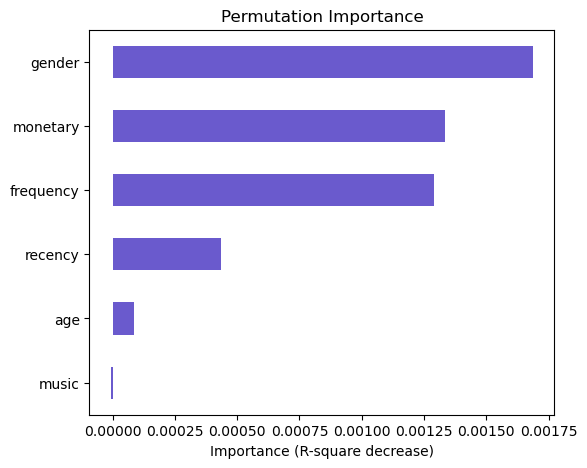

In [49]:
linear.plot("vimp")

# The variable with the highest vimp is: Monetary. 
# This means that Monetary is the most important variable in predicting the ordersize.

### Question 9

What do the linear regression model results suggest about our ability to predict ordersize for customers who responded to the deal?


The linear regression model results suggest that our ability to predict ordersize for customers who responded to the deal is not good. The R-squared is 0.02, which means that only 2% of the variation in ordersize is explained by the model. 

The F-statistic is 0.939, which is very small. The p-value is 0.475, which is greater than 0.05. This means that the model is not statistically significant, we fail to reject the H0 that the effect of x on ordersize is zero. The model is useless.


### Question 10

Add the predicted values from the linear regression to the "tuango" data.frame. Compare the average of the predicted values to the average value of ordersize. Make sure to focus only on buyers. What do you notice?

In [50]:
linear_predict = linear.predict()
linear_predict

tuango_1 = tuango[tuango['buyer_yes'] == 1].copy()


#tuango_1

tuango_1['pred_linear'] = linear_predict['prediction']
tuango_1.head(20)

tuango_1['pred_linear'].mean(), tuango_1['ordersize'].mean()

diff = tuango_1['pred_linear'].mean() - tuango_1['ordersize'].mean()
diff

tuango_1['pred_linear'].mean(), tuango_1[tuango_1['buyer'] == 'yes']['ordersize'].mean()
#diff

# after comparing the average of the predicted values to the overall response rate, 
# the diff between the average of the predicted values and the overall response rate is 3.5603257647364233,
# which is not very small. This means we need to improve the model.


(3.941089108910902, 3.9410891089108913)

## Part III: Profitability Analysis
### Question 11

What is the breakeven response rate? Use the average ordersize from question 2 in your revenue calculations.

In [51]:
# state your assumptions that are relevant to calculate 
# the breakeven response rate
# breakeven should be of type `float`
avg_ordersize = q2.loc["yes", "mean"]
total_rev_per_order = 49.0 * avg_ordersize
tuango_fee = 0.5 * total_rev_per_order
#net_rev_per_order = total_rev_per_order - tuango_fee

cost = 9.0
margin = tuango_fee
#margin = net_rev_per_order - cost


#cost =  # float
#margin =  # float
breakeven = cost / margin # float, do not apply rounding, do not express as a percentage
q11 = breakeven # float, DO NOT APPLY ROUNDING, do not express as a percentage
q11, avg_ordersize

(ordersize    0.093209
 Name: yes, dtype: float64,
 ordersize    3.941089
 Name: yes, dtype: float64)

### Question 12

What is the projected profit in RMB and the return on marketing expenditures if you offer the deal to all 397,252 remaining customers (i.e., target everyone)?

In [52]:
tuango.head()
tuango_notest = tuango[tuango['test'] == 0]
tuango_notest.head(10)
print(len(tuango_notest))

397252


In [53]:
tuango['mailto_logit'] = (tuango['pred_logit'].values > 0.093209).astype(int)
#nr_mail = tuango.groupby('mailto_logit').mailto_logit.agg(n_obs = 'count')
#nr_mail['perc'] = (100 * nr_mail / nr_mail.sum()).round(2).astype(str) + '%'
#nr_mail

#nr_mail.loc[1, 'perc']

tuango.head()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test,buyer_yes,pred_logit,mailto_logit
0,U15889344,no,0.0,309,7.0,39.799999,44,F,yes,0.0,1,0.0,0.141318,1
1,U60246497,no,0.0,297,8.0,39.799999,80,M,yes,1.0,1,0.0,0.064122,0
2,U22965759,no,0.0,295,1.0,72.900002,59,F,yes,1.0,1,0.0,0.072710,0
3,U40811142,no,0.0,277,1.0,40.000000,37,F,yes,0.0,1,0.0,0.088488,0
4,U76283952,no,0.0,259,1.0,21.000000,43,F,yes,1.0,1,0.0,0.080623,0


In [54]:
# insert calculation code here
# all variables should be numeric (integer or float) and of length 1
# _all stands for 'targeting all'
tuango["message_all"] = True


nr_message_all = 397252.0 # total number of messages that would be sent out
message_cost_all = cost * nr_message_all# total cost of sending messages to selected customers (float)
nr_responses_all = nr_message_all * tuango['buyer_yes'].mean()# total number of positive responses
response_rate_all = tuango['buyer_yes'].mean() # expressed as a proportion (no rounding)
revenue_all = 49 * nr_responses_all * avg_ordersize# total revenue in RMB (no rounding)
profit_all = 0.5 * revenue_all - message_cost_all # 0.5 * revenue - message_cost - total profit in RMB (no rounding)
ROME_all = profit_all / message_cost_all# Return on Marketing Expenditures expressed as a proportion (no rounding)

#ROME_all
#profit_all
nr_message_all, message_cost_all, nr_responses_all, response_rate_all, revenue_all, profit_all, ROME_all

(397252.0,
 3575268.0,
 38380.0,
 0.09661373636885402,
 ordersize    7411691.0
 Name: yes, dtype: float64,
 ordersize    130577.5
 Name: yes, dtype: float64,
 ordersize    0.036522
 Name: yes, dtype: float64)

### Question 13

Evaluate the performance implications of offering the deal to only those customers (out of 397,252) with a predicted probability of purchase greater than the breakeven response rate. Determine the projected profit in RMB and the return on marketing expenditures both approaches.

Note: Fine tune your estimate from Q2 above by determining the average amount spent among the people that (1) will receive a message and (2) bought a karaoke deal. Also, use the actual number of messages you plan to send out to the group of customers in the rollout sample (i.e., "test == 0")

In [55]:
predict = tuango[tuango['buyer_yes'].isna()].reset_index(drop=True)
#predict.head()

predictions= lr.predict(predict)['prediction']

nr_message_logit = (predictions > 0.093209).sum()  # total number of messages that would be sent out
nr_message_logit


174126

In [56]:
tuango["message_logit"] = tuango.pred_logit > 0.093209
#nr_mail = tuango.groupby('message_logit').message_logit.agg(n_obs = 'count')
#nr_mail['perc'] = (100 * nr_mail / nr_mail.sum()).round(2).astype(str) + '%'
#nr_mail
#tuango
#tuango.shape

In [57]:
tuango_drop = tuango.dropna()

In [58]:
num_buyeryes_message1 = len(tuango_drop[(tuango_drop['message_logit']) & (tuango_drop['buyer_yes'] == 1)])
message_logit_1 = len(tuango_drop[tuango_drop['message_logit']])
response_rate = num_buyeryes_message1 / message_logit_1
response_rate

avg_ordersize2 = tuango_drop[(tuango_drop['buyer_yes'] == 1) & (tuango_drop['message_logit'])]['ordersize'].mean()
response_rate, avg_ordersize2

(0.14456651800282824, 3.9699021820917983)

In [59]:
#nr_message_logit = tuango_drop['message_logit'].sum()# total number of messages that would be sent out
message_cost_logit = cost * nr_message_logit# total cost of sending messages to selected customers (float)
nr_responses_logit = nr_message_logit * response_rate# total number of positive responses
response_rate_logit = response_rate# expressed as a proportion (no rounding)
revenue_logit = 49.00 * nr_responses_logit * avg_ordersize2 # total revenue in RMB (no rounding)
profit_logit = 0.5 * revenue_logit - message_cost_logit# 0.5 * revenue - message_cost - total profit in RMB (no rounding)
ROME_logit = profit_logit / message_cost_logit# Return on Marketing Expenditures expressed as a proportion (no rounding)

nr_message_logit, message_cost_logit, nr_responses_logit, response_rate_logit, revenue_logit, profit_logit, ROME_logit



(174126,
 1567134.0,
 25172.789513760472,
 0.14456651800282824,
 4896742.088980746,
 881237.0444903732,
 0.5623239904758452)

In [60]:
tuango_drop.head()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test,buyer_yes,pred_logit,mailto_logit,message_all,message_logit
0,U15889344,no,0.0,309,7.0,39.799999,44,F,yes,0.0,1,0.0,0.141318,1,True,True
1,U60246497,no,0.0,297,8.0,39.799999,80,M,yes,1.0,1,0.0,0.064122,0,True,False
2,U22965759,no,0.0,295,1.0,72.900002,59,F,yes,1.0,1,0.0,0.072710,0,True,False
3,U40811142,no,0.0,277,1.0,40.000000,37,F,yes,0.0,1,0.0,0.088488,0,True,False
4,U76283952,no,0.0,259,1.0,21.000000,43,F,yes,1.0,1,0.0,0.080623,0,True,False


### Question 14

Create a bar chart with profit information for the analyses conducted in questions 12 and 13

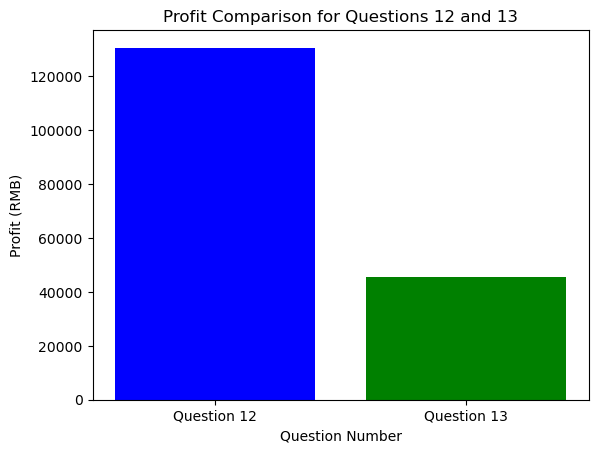

In [61]:
# bar chart with profit information
import matplotlib.pyplot as plt

profit_q12 = 130577.5
profit_q13 = 45586.831931

# Names of the analyses
questions = ['Question 12', 'Question 13']

# Corresponding profit values
profits = [profit_q12, profit_q13]

# Create a bar chart
plt.bar(questions, profits, color=['blue', 'green'])

# Add title and labels
plt.title('Profit Comparison for Questions 12 and 13')
plt.xlabel('Question Number')
plt.ylabel('Profit (RMB)')

# Show the bar chart
plt.show()

### Question 15

Create a bar chart with ROME for the analyses conducted in questions 12 and 13

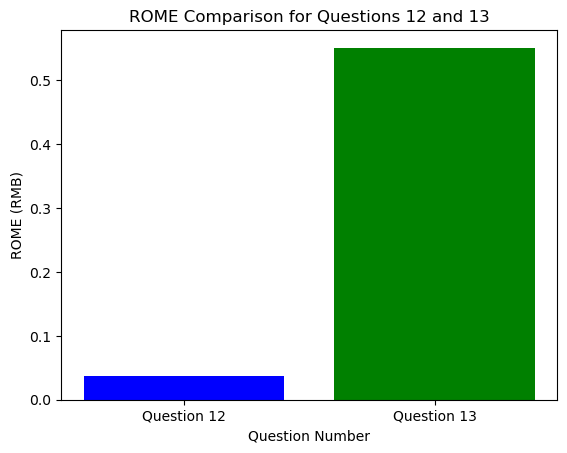

In [62]:
# bar chart with profit information
import matplotlib.pyplot as plt

ROME_q12 = 0.036522
ROME_q13 = 0.550985

# Names of the analyses
questions = ['Question 12', 'Question 13']

# Corresponding profit values
ROME = [ROME_q12, ROME_q13]

# Create a bar chart
plt.bar(questions, ROME, color=['blue', 'green'])

# Add title and labels
plt.title('ROME Comparison for Questions 12 and 13')
plt.xlabel('Question Number')
plt.ylabel('ROME (RMB)')

# Show the bar chart
plt.show()

### Question 16

You also have access to a dataset with the results from the deal offer roll-out (tuango_post.parquet). Tuango decided to contact all remaining 397,252 customers because this would provide data that could be used to evaluate different targeting approaches. The data has a "test" variable (test = 1 for the data used in the test, test = 0 for the remaining customers). You can use this variable to help evaluate the actual performance for the targeting approaches evaluated in questions 12 and 13. Re-create the plots from question 14 and 15 based on this new dataset.

Copy your tuango-pre.ipynb file to a new file tuango-post.ipynb. Instead of using the tuango_pre.parquet data, load tuango_post.parquet. You should be able to re-use most of your code and text. Calculate the actual performance for both targeting approach on the 'roll out' sample (i.e., test == 0).

Hint 1: It is important that you do NOT use any information about buyers that were in the 'roll out' sample (i.e., test == 0) when calculating the break-even response rate etc. for targeting.

Hint 2: You have the actual data on what happened in the "post" data. Use that information to calculate performance (i.e., do not "project" the performance like you had to do for questions 12 and 13).



### Question 17

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment. Provide pdfs and/or screenshots of your “discussions” with these tools and comment on what things did and did not go well. Also add any questions you may have about the assignment and the support you received from GenAI so we can discuss these topics in class.

Note: No matter how you used Generative AI-tools, you will be expected to fully understand all elements of the assignment. You may be called on in class to walk us through your thought process and how different parts of your code work. 


### see the pdf file